In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
!pip install eli5
import eli5
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
!pip install shap
import shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=1a74e2a5ef2ac4dee9e10ecc21e98c5ca85c92a49e694773762a97e17f9d0838
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=bb64ffe472365ca43367d7ed4b21e1ada41362ce4ec92475d599aecea6fa512f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.7 MB/s eta 0:00:00


In [2]:
# Load the dataset
data = pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Summary statistics for numerical features
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Data types and info
print(data.info())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

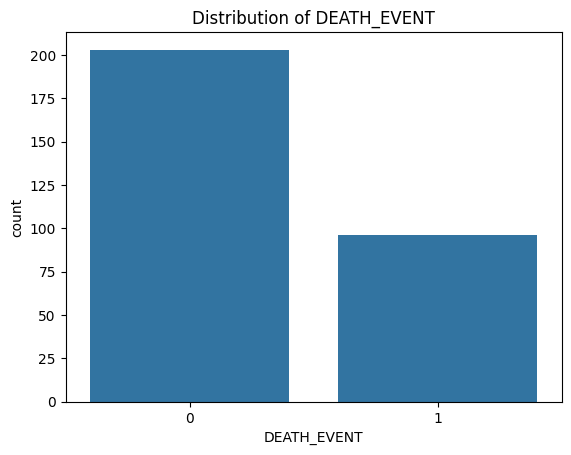

In [4]:
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Distribution of DEATH_EVENT')
plt.show()


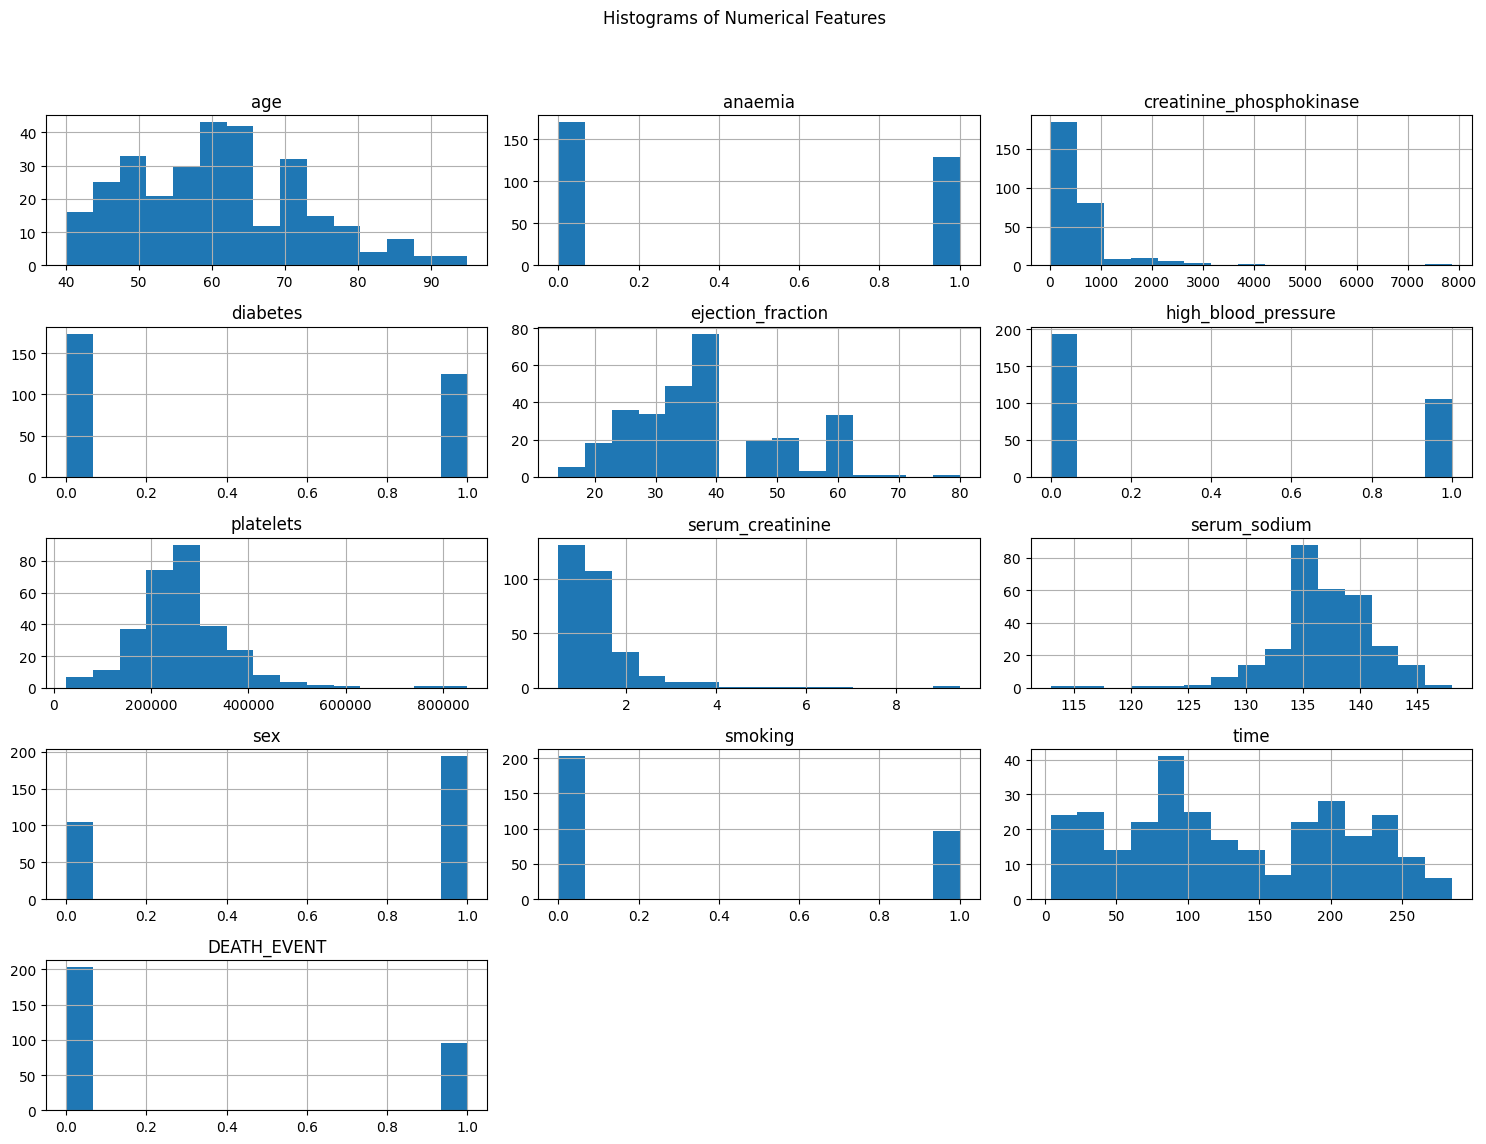

In [5]:
# Adjusting the layout to 5 rows and 3 columns
data.hist(bins=15, figsize=(15, 12), layout=(5, 3))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the subplot params so that the subplot(s) fits in to the figure area.
plt.show()



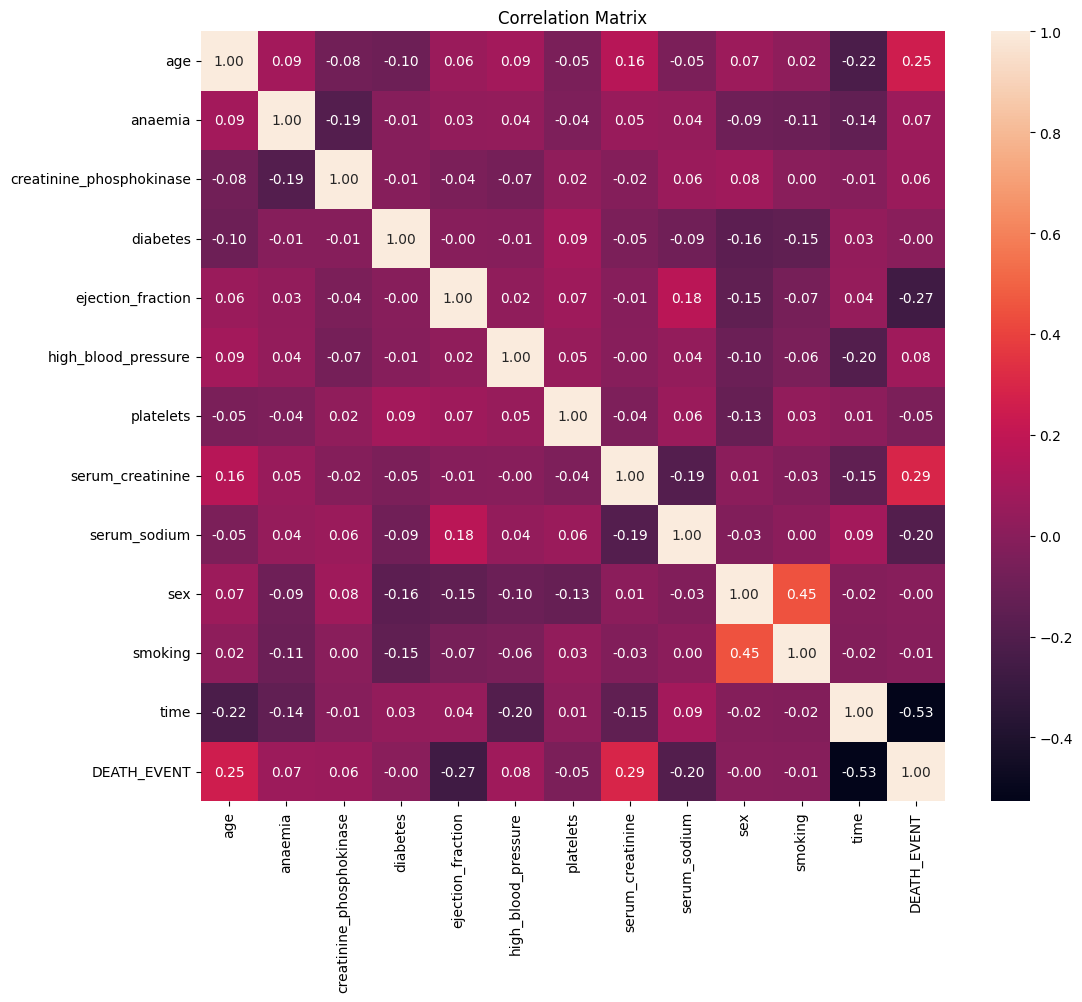

In [6]:
# EDA: Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Preprocessing
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Define models
models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': xgb.XGBClassifier()
}

In [10]:
# Hyperparameters grid
param_grids = {
    'LR': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'DT': {'max_depth': [3, 5, 7, 9, None]},
    'RF': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, None]},
    'XGB': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
}


In [11]:
# GridSearchCV and model evaluation
best_estimators = {}
for model_name, model in models.items():
    clf = GridSearchCV(model, param_grids[model_name], cv=5, scoring=['accuracy', 'roc_auc'], refit='accuracy')
    clf.fit(X_train_scaled, y_train)
    best_estimators[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"{model_name} Accuracy: {clf.score(X_test_scaled, y_test)}")
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    print(f"{model_name} AUC-ROC: {roc_auc_score(y_test, y_proba)}")

Best parameters for LR: {'C': 1}
LR Accuracy: 0.8
LR AUC-ROC: 0.824
Best parameters for DT: {'max_depth': 3}
DT Accuracy: 0.6833333333333333
DT AUC-ROC: 0.672
Best parameters for RF: {'max_depth': 7, 'n_estimators': 300}
RF Accuracy: 0.75
RF AUC-ROC: 0.8445714285714285
Best parameters for XGB: {'max_depth': 3, 'n_estimators': 300}
XGB Accuracy: 0.7666666666666667
XGB AUC-ROC: 0.8777142857142857


In [12]:
# Model interpretation with eli5
eli5.show_weights(best_estimators['LR'], feature_names=list(X.columns))

In [18]:
# Model interpretation with LIME

# Create the LIME Explainer
explainer = LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Survived', 'Not Survived'], mode='classification')

# Randomly select an instance to explain
i = np.random.randint(0, X_test_scaled.shape[0])

# Models to explain
models_to_explain = {
    'RF': best_estimators['RF'],
    'XGB': best_estimators['XGB']
}

for model_name, model in models_to_explain.items():
    print(f"\nExplaining instance {i} using {model_name} model")
    exp = explainer.explain_instance(X_test_scaled[i], model.predict_proba, num_features=len(X.columns))

    # Display in notebook
    exp.show_in_notebook(show_table=True)

    # Access and print the linear model components
    print(f"Intercept for {model_name} model: {exp.intercept}")
    print(f"Coefficients for {model_name} model:")
    for feature, coef in zip(X.columns, exp.local_exp[1]):
        print(f"  {feature}: {coef}")
    # The R^2 value indicates how well the linear model approximates the complex model predictions locally
    print(f"R^2 value for {model_name} model: {exp.score}")







Explaining instance 38 using RF model


Intercept for RF model: {1: 0.4187761030481535}
Coefficients for RF model:
  age: (11, -0.12433711759596959)
  anaemia: (4, -0.05783222763279758)
  creatinine_phosphokinase: (2, -0.0430654619492391)
  diabetes: (7, -0.03134954661939895)
  ejection_fraction: (0, -0.029214205987753736)
  high_blood_pressure: (6, -0.026795644281197368)
  platelets: (8, -0.01587657992392753)
  serum_creatinine: (3, -0.014979806318723674)
  serum_sodium: (1, -0.013992155502527614)
  sex: (9, 0.010934158953314656)
  smoking: (10, -0.007441943857810266)
  time: (5, -0.004948808773224953)
R^2 value for RF model: 0.07990068104490744

Explaining instance 38 using XGB model


Intercept for XGB model: {1: 0.49329424422743573}
Coefficients for XGB model:
  age: (11, -0.241285167744419)
  anaemia: (2, -0.20093628249669362)
  creatinine_phosphokinase: (4, -0.07829066703216835)
  diabetes: (7, -0.044493888368176145)
  ejection_fraction: (10, 0.04004117070006232)
  high_blood_pressure: (6, -0.03368639644479321)
  platelets: (9, -0.03146705103522987)
  serum_creatinine: (8, 0.013337423492946069)
  serum_sodium: (3, 0.011720396510489636)
  sex: (0, -0.009207115482646046)
  smoking: (5, -0.005711923197983958)
  time: (1, -0.0018443679823815975)
R^2 value for XGB model: 0.13617221298270288


Positive Instance Index: 2
Force Plot for Positive Instance:
Negative Instance Index: 0
Force Plot for Negative Instance:
SHAP Summary Plot (Bar):


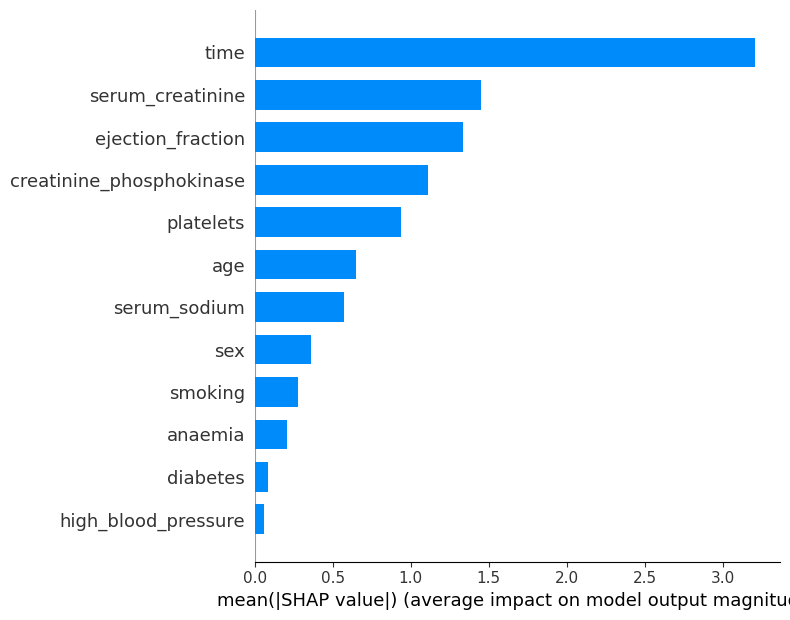

SHAP Summary Plot (Dot):


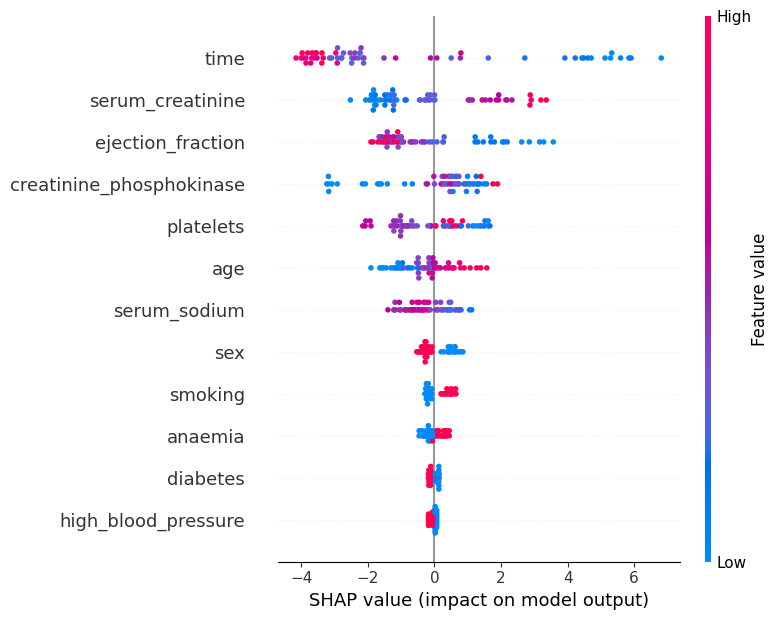

In [21]:
# Model interpretation with SHAP

shap.initjs()
explainer = shap.TreeExplainer(best_estimators['XGB'])
shap_values = explainer.shap_values(X_test_scaled)

# Establish base value for force_plot
base_value = explainer.expected_value

# Find the index of the first positive instance in y_test
positive_instance_index = y_test[y_test == 1].index[0]

# Find the corresponding index in X_test_scaled
positive_instance_index_scaled = y_test.index.get_loc(positive_instance_index)

# Print the index to ensure it exists in X_test_scaled
print("Positive Instance Index:", positive_instance_index_scaled)

# Create force_plot for the positive instance
print("Force Plot for Positive Instance:")
shap.force_plot(base_value, shap_values[positive_instance_index_scaled], X_test_scaled[positive_instance_index_scaled], feature_names=X.columns)

# Find the index of the first negative instance in y_test
negative_instance_index = y_test[y_test == 0].index[0]

# Find the corresponding index in X_test_scaled
negative_instance_index_scaled = y_test.index.get_loc(negative_instance_index)

# Print the index to ensure it exists in X_test_scaled
print("Negative Instance Index:", negative_instance_index_scaled)

# Create force_plot for the negative instance
print("Force Plot for Negative Instance:")
shap.force_plot(base_value, shap_values[negative_instance_index_scaled], X_test_scaled[negative_instance_index_scaled], feature_names=X.columns)


# Create feature importance plots using summary_plot
print("SHAP Summary Plot (Bar):")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")

print("SHAP Summary Plot (Dot):")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)




In [22]:
# Assuming best_estimators contains the best models from GridSearchCV
# and X_test_scaled is your scaled test features

# Get predicted probabilities
probs_lr = best_estimators['LR'].predict_proba(X_test_scaled)
probs_dt = best_estimators['DT'].predict_proba(X_test_scaled)
probs_rf = best_estimators['RF'].predict_proba(X_test_scaled)
probs_xgb = best_estimators['XGB'].predict_proba(X_test_scaled)

# Print the probabilities for the first instance in the test set
print(f"False/True label: 0/1")
print(f"* LR: {probs_lr[0]}")
print(f"* DT: {probs_dt[0]}")
print(f"* RF: {probs_rf[0]}")
print(f"* XGB: {probs_xgb[0]}")

False/True label: 0/1
* LR: [0.93211417 0.06788583]
* DT: [0.26666667 0.73333333]
* RF: [0.51170923 0.48829077]
* XGB: [0.66768277 0.33231726]


In [23]:
# Predictions

import numpy as np

# Assuming y_test is correctly aligned with X_test_scaled
positive_indices = np.where(y_test == 1)[0]  # Find all positive example indices
negative_indices = np.where(y_test == 0)[0]  # Find all negative example indices

if len(positive_indices) > 0 and len(negative_indices) > 0:
    # Safely select the first positive and negative example
    positive_index = positive_indices[0]
    negative_index = negative_indices[0]

    for model_name, model in best_estimators.items():
        positive_pred = model.predict(X_test_scaled[positive_index].reshape(1, -1))
        negative_pred = model.predict(X_test_scaled[negative_index].reshape(1, -1))
        print(f"{model_name} prediction for positive instance: {positive_pred}")
        print(f"{model_name} prediction for negative instance: {negative_pred}")
else:
    print("Couldn't find both positive and negative instances.")



LR prediction for positive instance: [0]
LR prediction for negative instance: [0]
DT prediction for positive instance: [0]
DT prediction for negative instance: [1]
RF prediction for positive instance: [0]
RF prediction for negative instance: [0]
XGB prediction for positive instance: [0]
XGB prediction for negative instance: [0]
